# 비대칭 데이터 문제

데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(Accuracy)가 높아도 정밀도(Precision)가 떨어진다.

이러한 경우를 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

In [246]:
from sklearn.datasets import make_classification

X00, y00 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_classes=2, n_clusters_per_class=1, class_sep=1, 
                               weights=[0.99, 0.01], random_state=1)

from sklearn.model_selection import train_test_split

X0, X_test, y0, y_test = train_test_split(X00, y00, test_size=0.25)

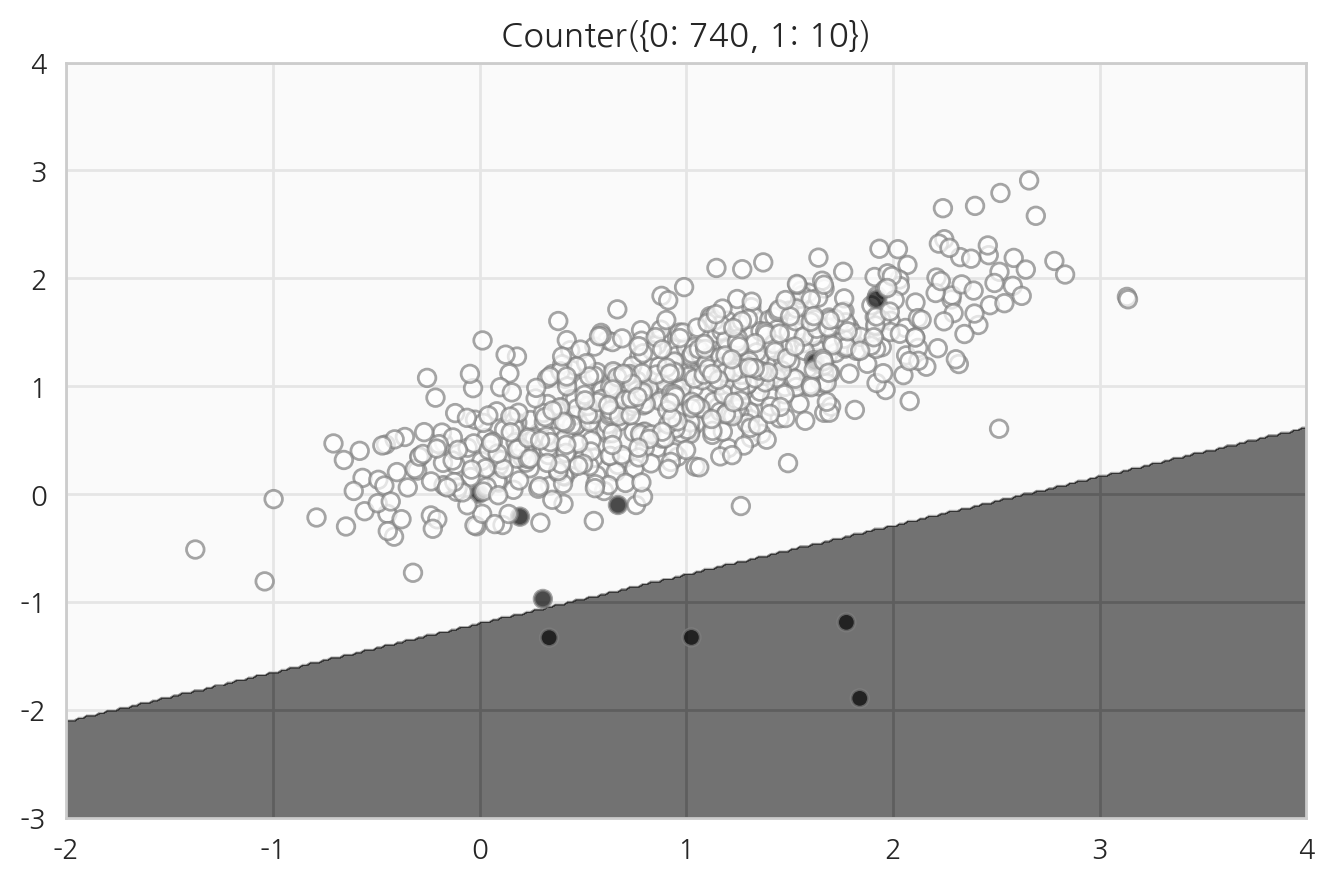

In [247]:
from collections import Counter
from sklearn.svm import SVC

def plot_samples(X=None, y=None):
    XX, YY = np.mgrid[-2:4:300j, -3:4:300j]
    if X is None:
        X = X0
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.title(Counter(y0))
    else:
        plt.subplot(121)
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y0))
        plt.subplot(122)
        model = SVC(kernel="linear").fit(X, y)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y))
        plt.tight_layout()
    plt.show()
    
    return model.predict(X)
    
y_pred = plot_samples()

In [248]:
from sklearn.metrics import classification_report

print(classification_report(y0, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       740
          1       1.00      0.40      0.57        10

avg / total       0.99      0.99      0.99       750



## 해결 방법

비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 **언더 샘플링**이나 소수 클래스 데이터를 증가시키는 **오버 샘플링**을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.

* 오버샘플링(Over-Sampling)
* 언더샘플링(Under-Sampling)
* 복합샘플링(Combining Over-and Under-Sampling)

<img src="https://datascienceschool.net/upfiles/c60d501391514092ae2044c39dc7bf7e.png">

## imbalanced-learn 패키지

imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지


```
pip install imblearn
```

## 언더 샘플링

* `RandomUnderSampler`: random under-sampling method
* `TomekLinks`: Tomek’s link method
* `CondensedNearestNeighbour`: condensed nearest neighbour method
* `OneSidedSelection`: under-sampling based on one-sided selection method
* `EditedNearestNeighbours`: edited nearest neighbour method
* `NeighbourhoodCleaningRule`: neighbourhood cleaning rule

In [249]:
from imblearn.under_sampling import *

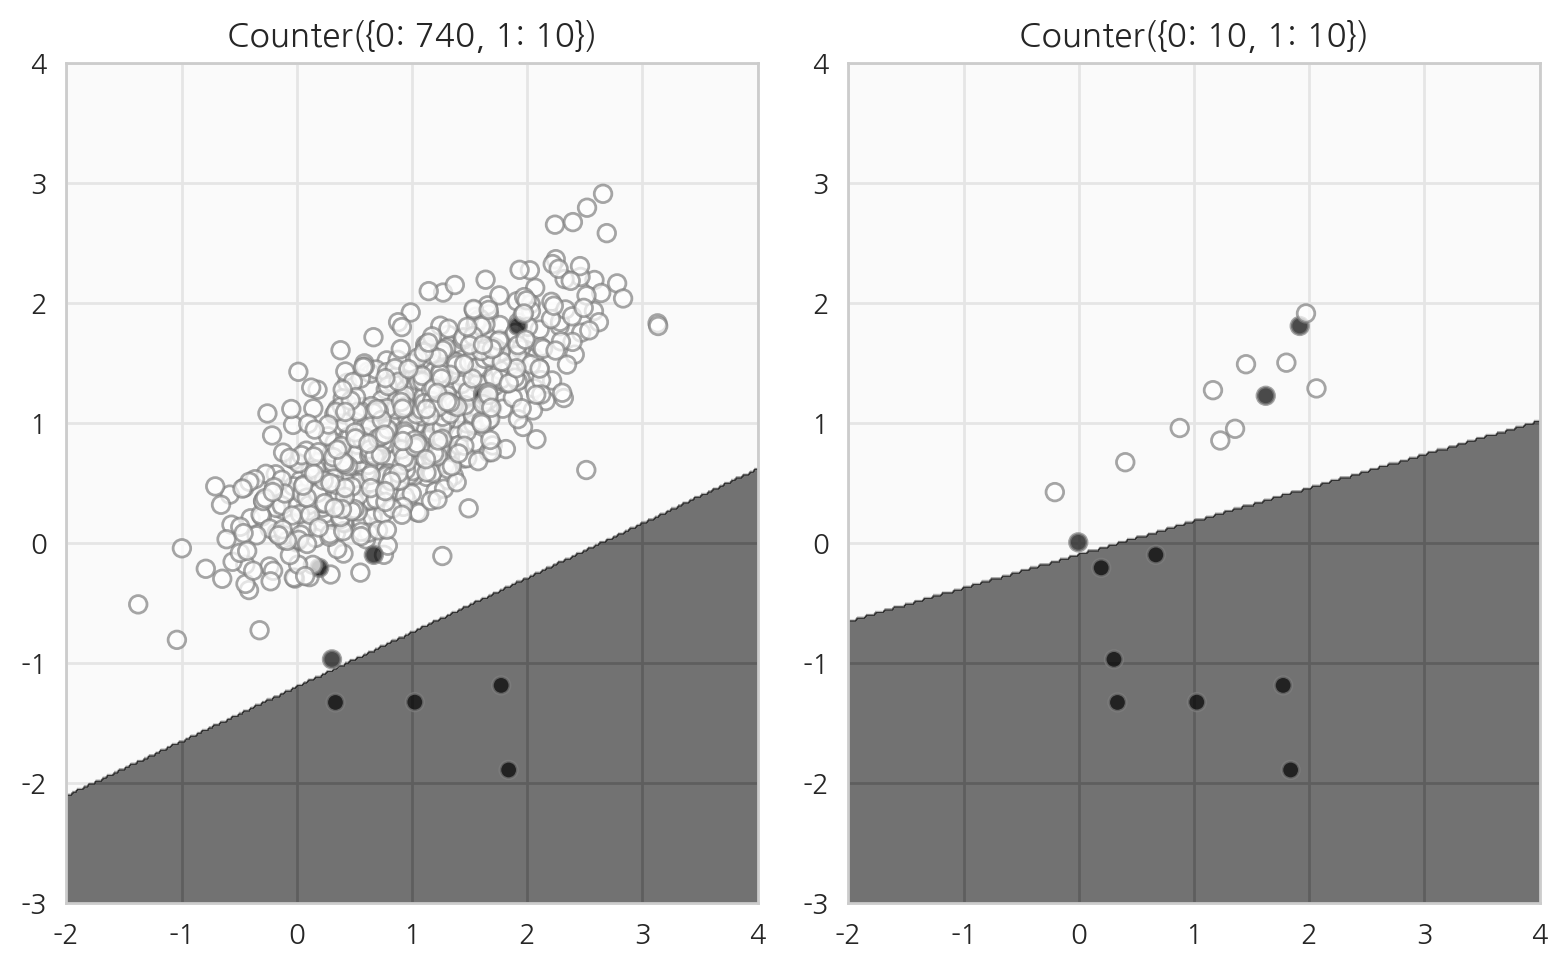

In [250]:
X, y = RandomUnderSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [251]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.77      1.00      0.87        10
          1       1.00      0.70      0.82        10

avg / total       0.88      0.85      0.85        20



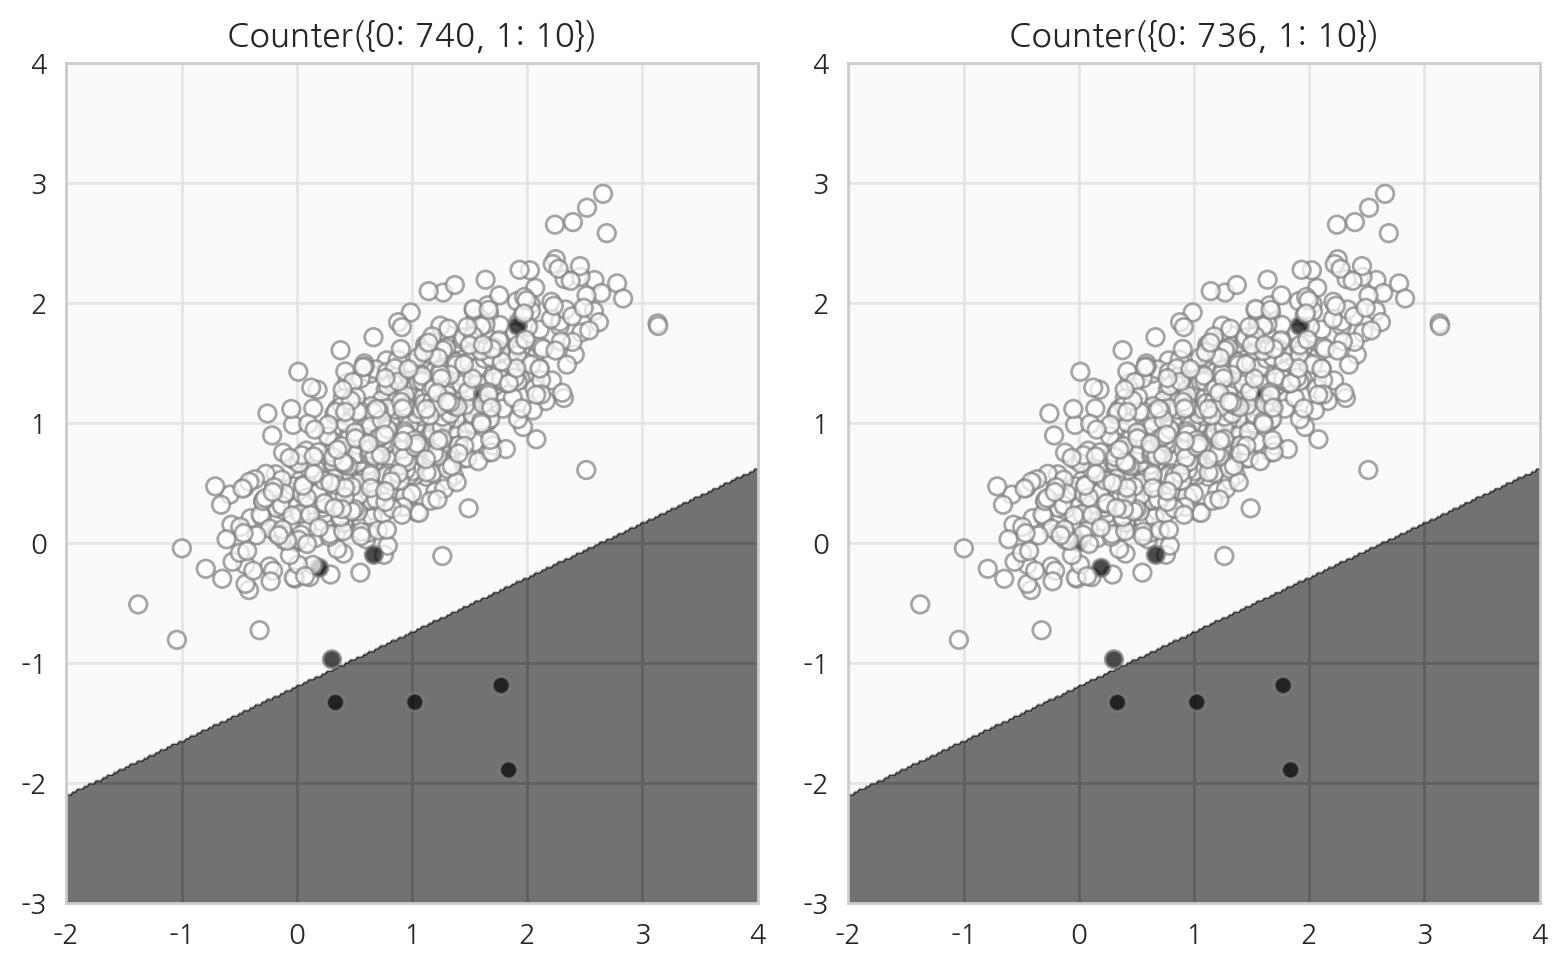

In [252]:
X, y = TomekLinks(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [253]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       736
          1       1.00      0.40      0.57        10

avg / total       0.99      0.99      0.99       746



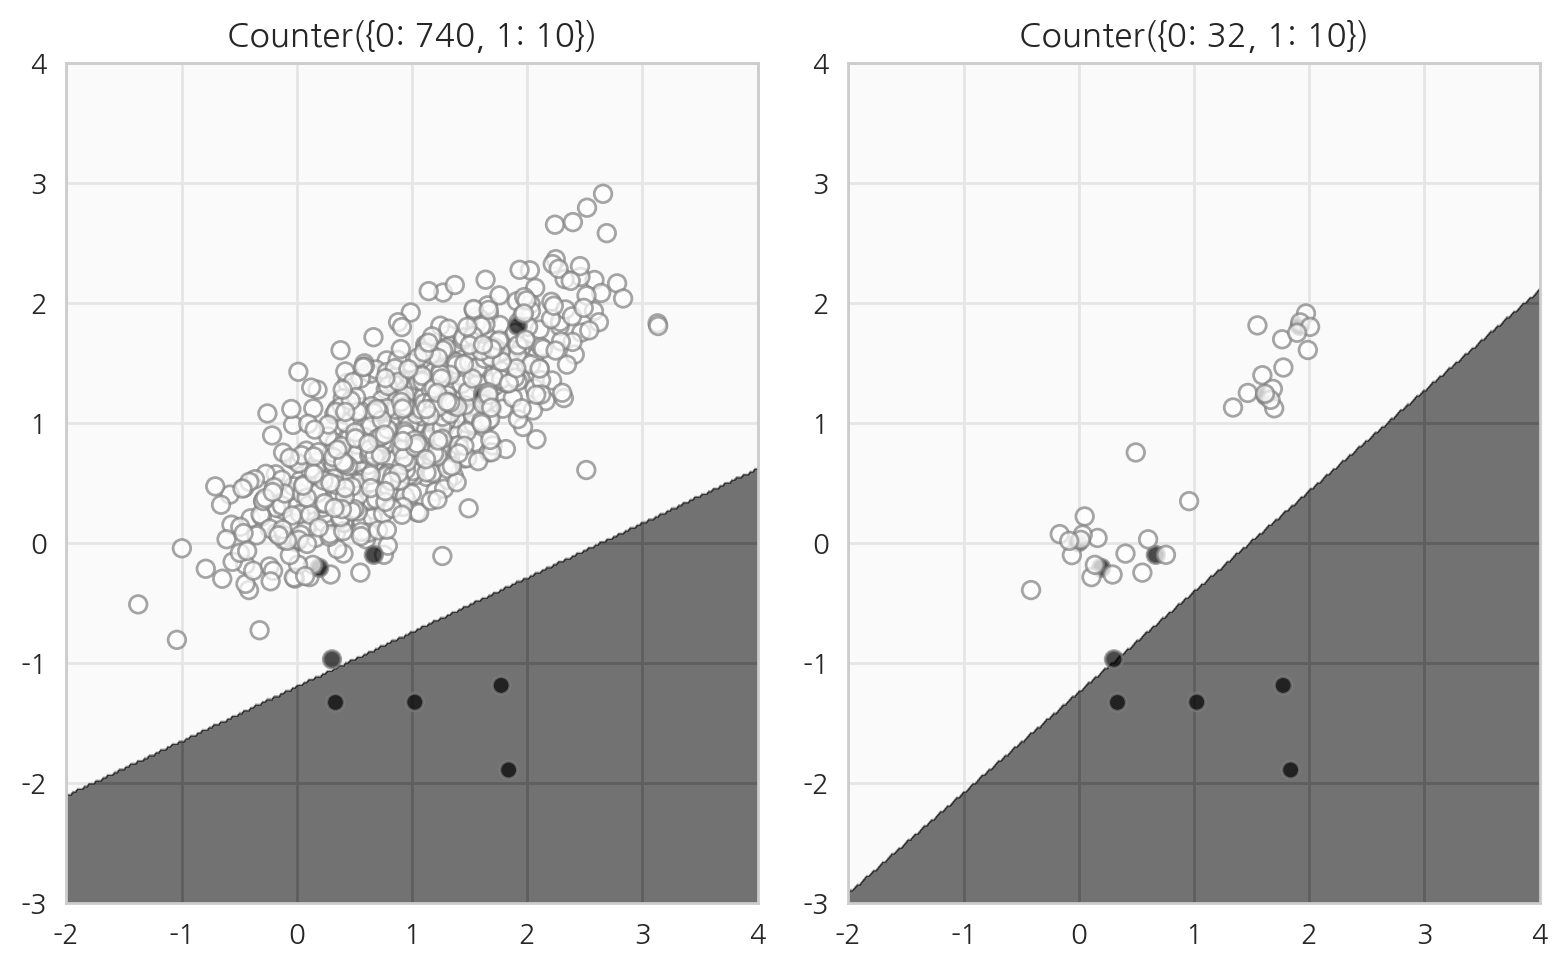

In [254]:
X, y = CondensedNearestNeighbour(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [255]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        32
          1       1.00      0.40      0.57        10

avg / total       0.88      0.86      0.83        42



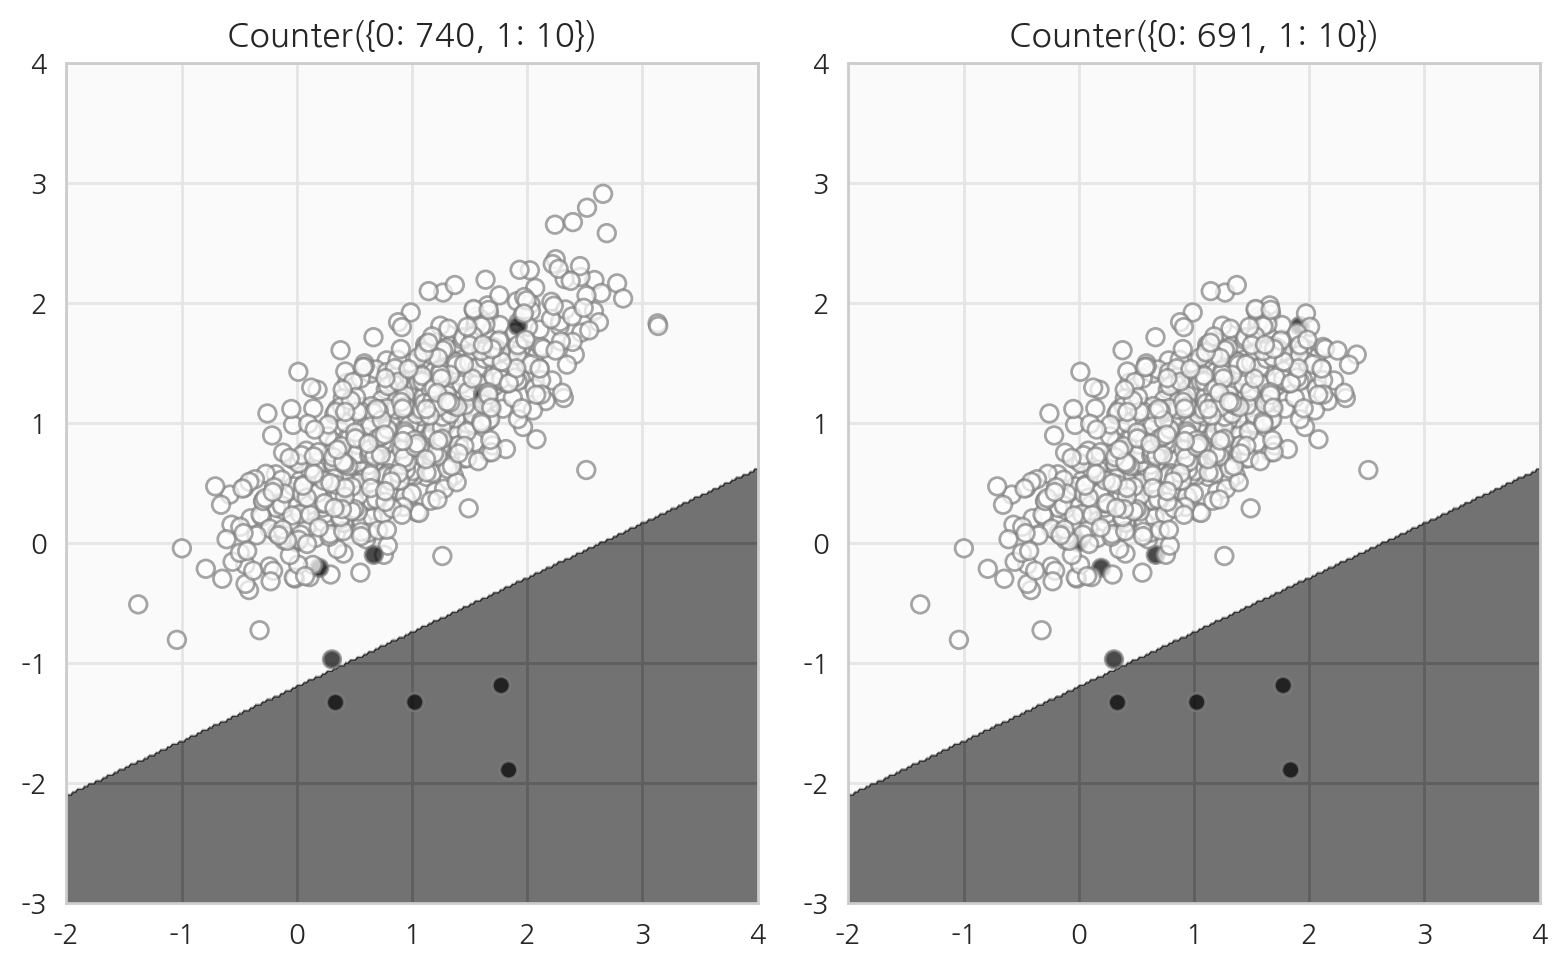

In [256]:
X, y = OneSidedSelection(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [257]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       691
          1       1.00      0.40      0.57        10

avg / total       0.99      0.99      0.99       701



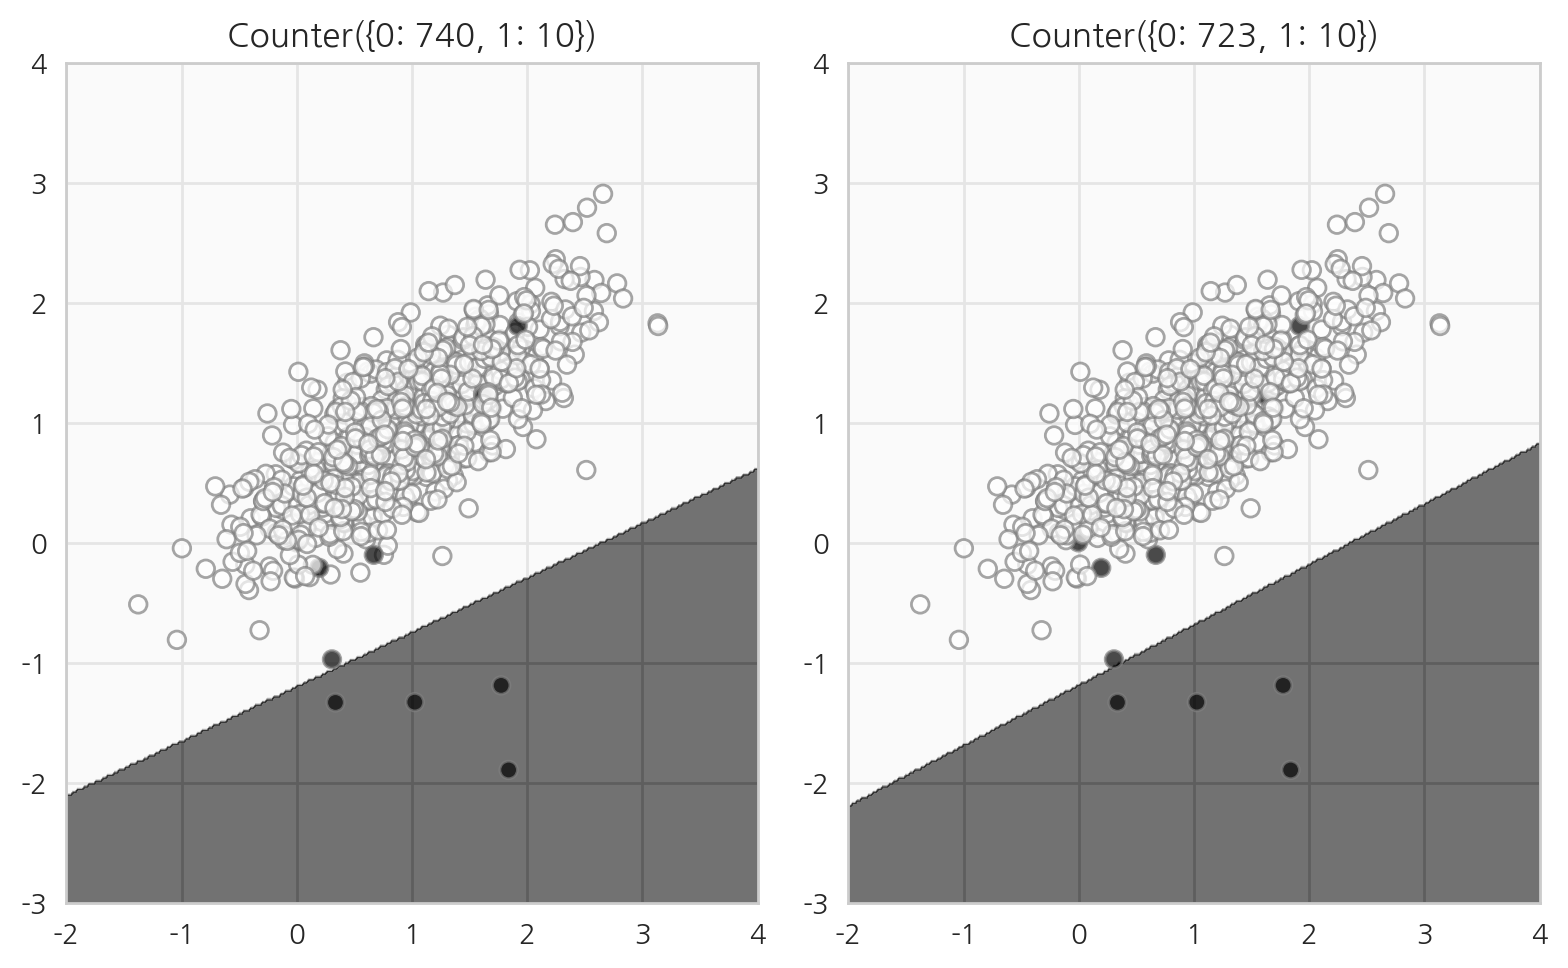

In [258]:
X, y = EditedNearestNeighbours(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [259]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       723
          1       1.00      0.40      0.57        10

avg / total       0.99      0.99      0.99       733



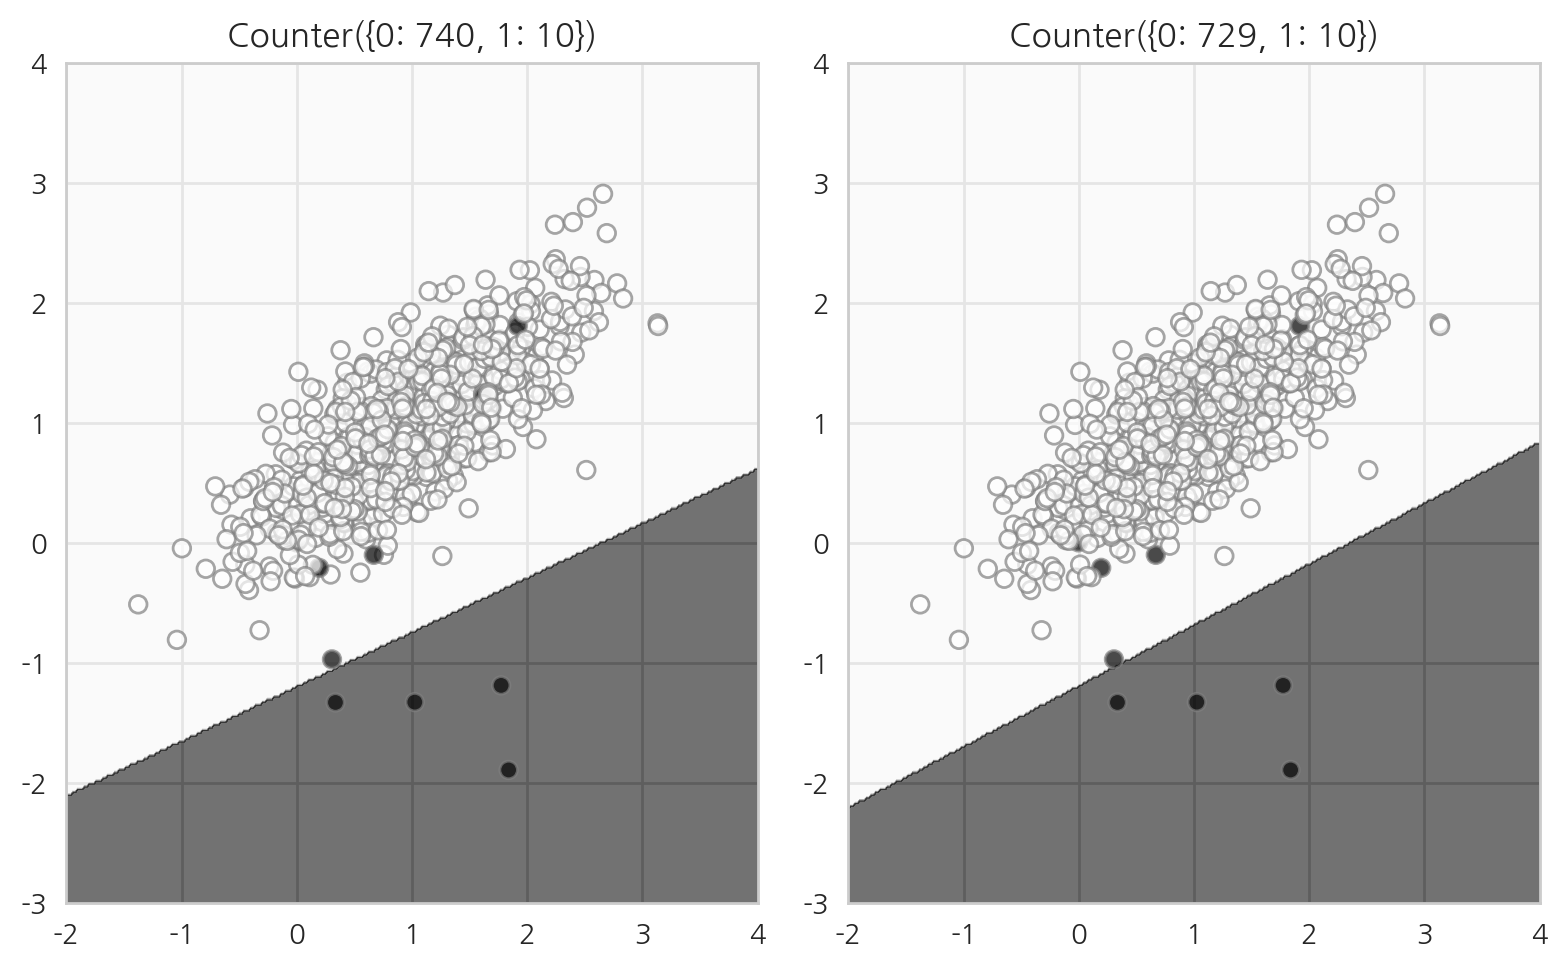

In [260]:
X, y = NeighbourhoodCleaningRule(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [261]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       729
          1       1.00      0.40      0.57        10

avg / total       0.99      0.99      0.99       739



## 오버 샘플링

* `RandomOverSampler`: random sampler
* `ADASYN`: Adaptive Synthetic Sampling Approach for Imbalanced Learning
* `SMOTE`: Synthetic Minority Over-sampling Technique

In [262]:
from imblearn.over_sampling import *

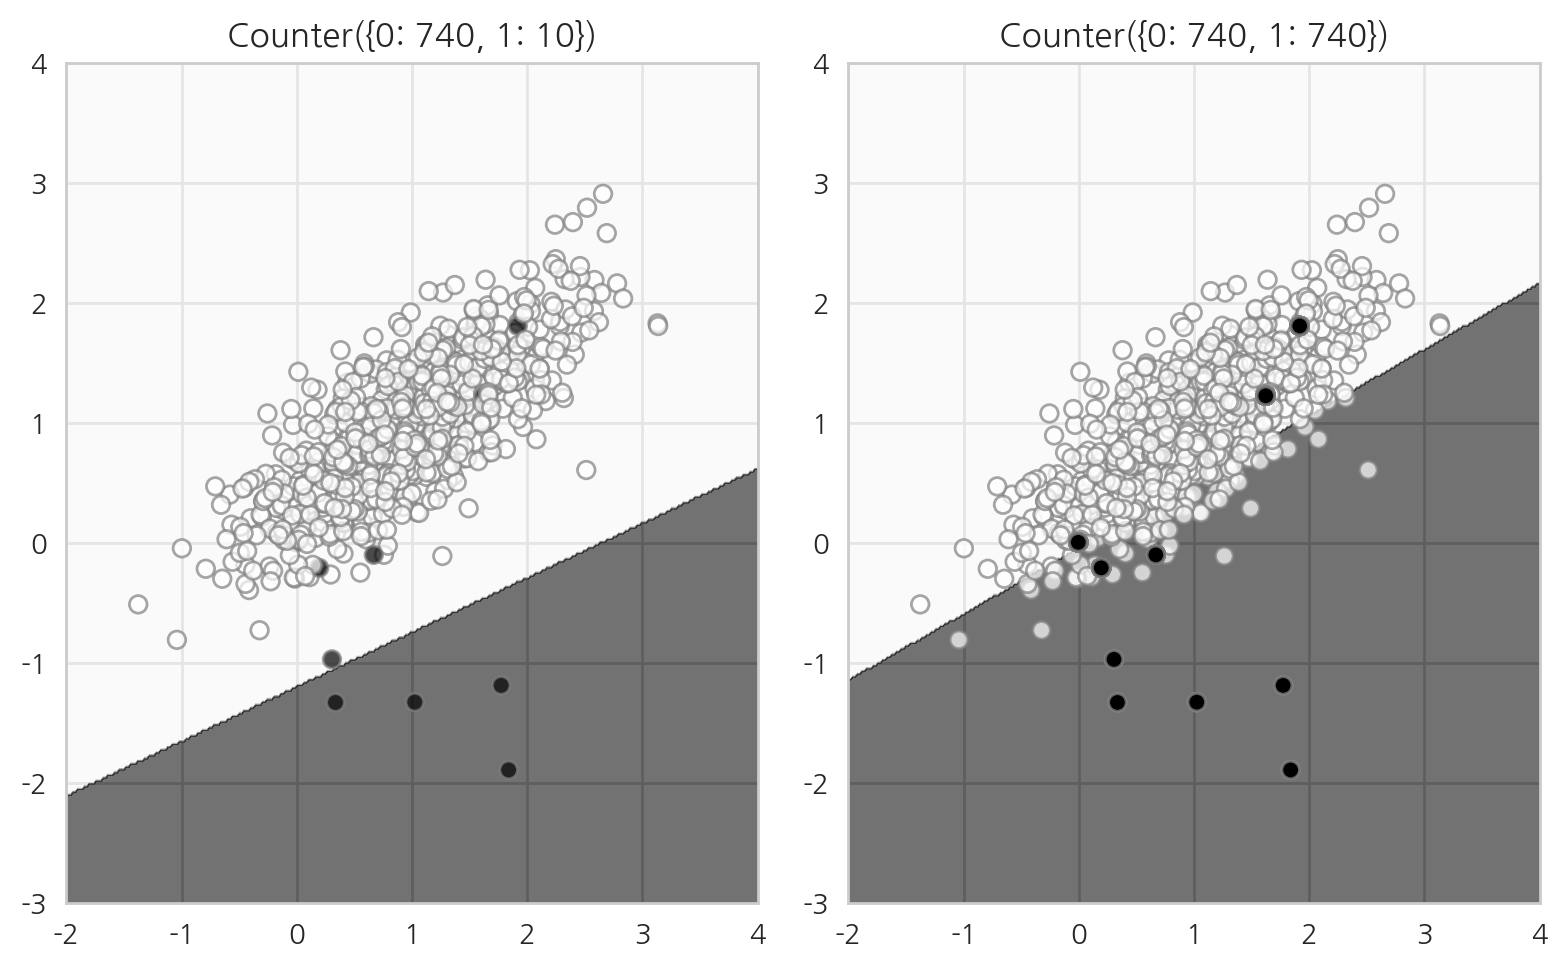

In [263]:
X, y = RandomOverSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [264]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83       740
          1       0.88      0.72      0.79       740

avg / total       0.82      0.81      0.81      1480



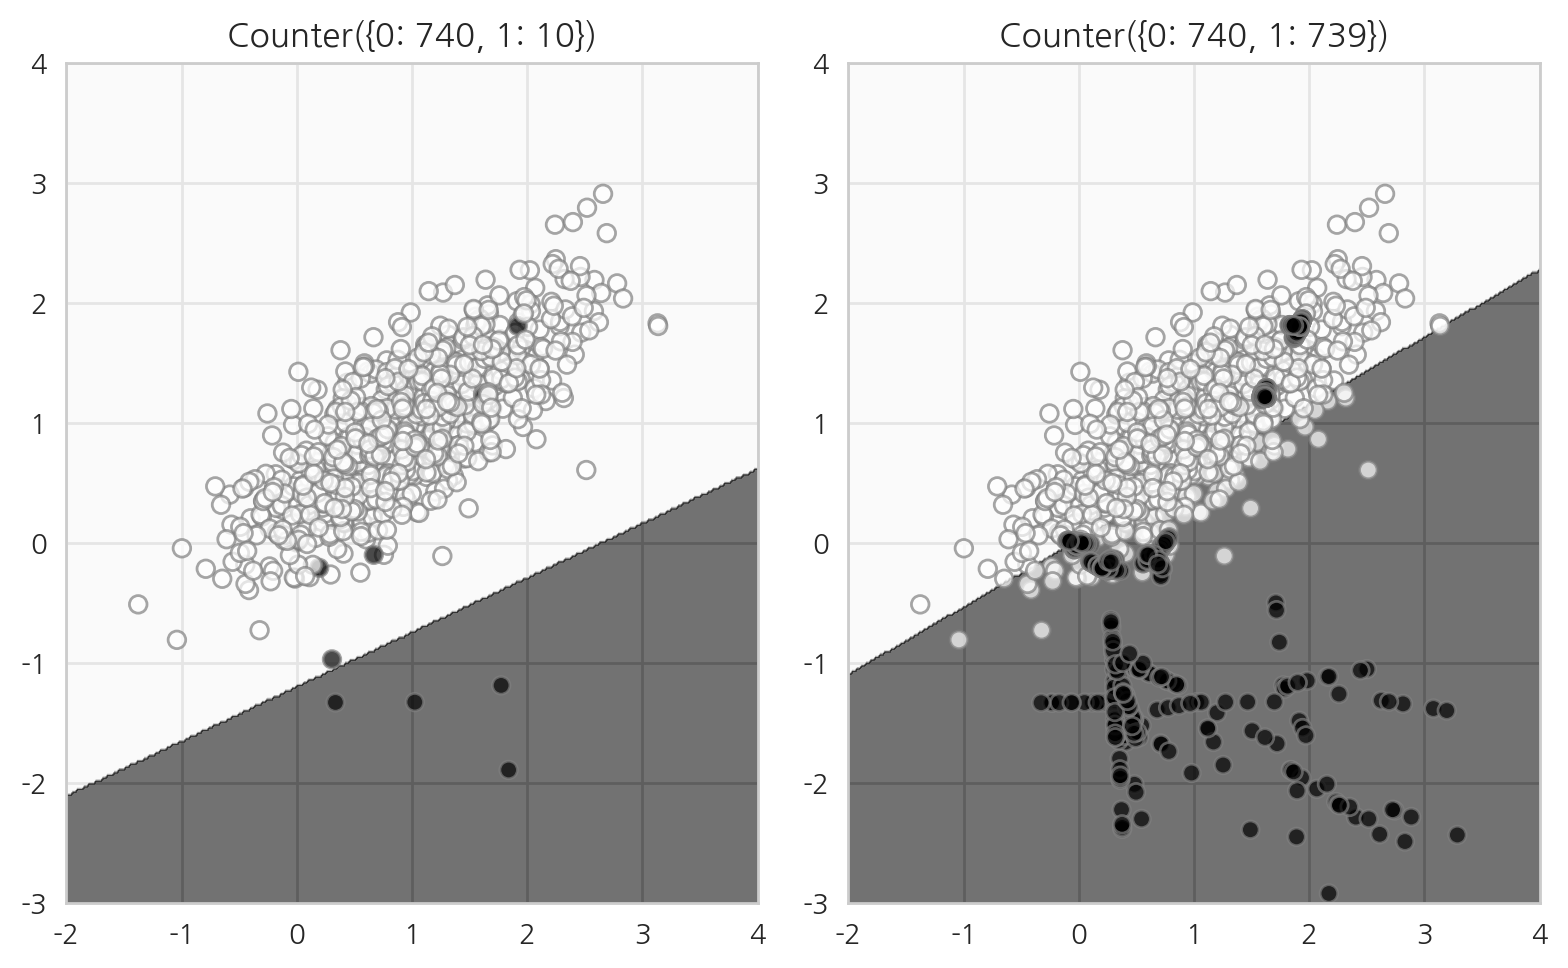

In [265]:
X, y = ADASYN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [266]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.86      0.79       740
          1       0.83      0.70      0.76       739

avg / total       0.78      0.78      0.77      1479



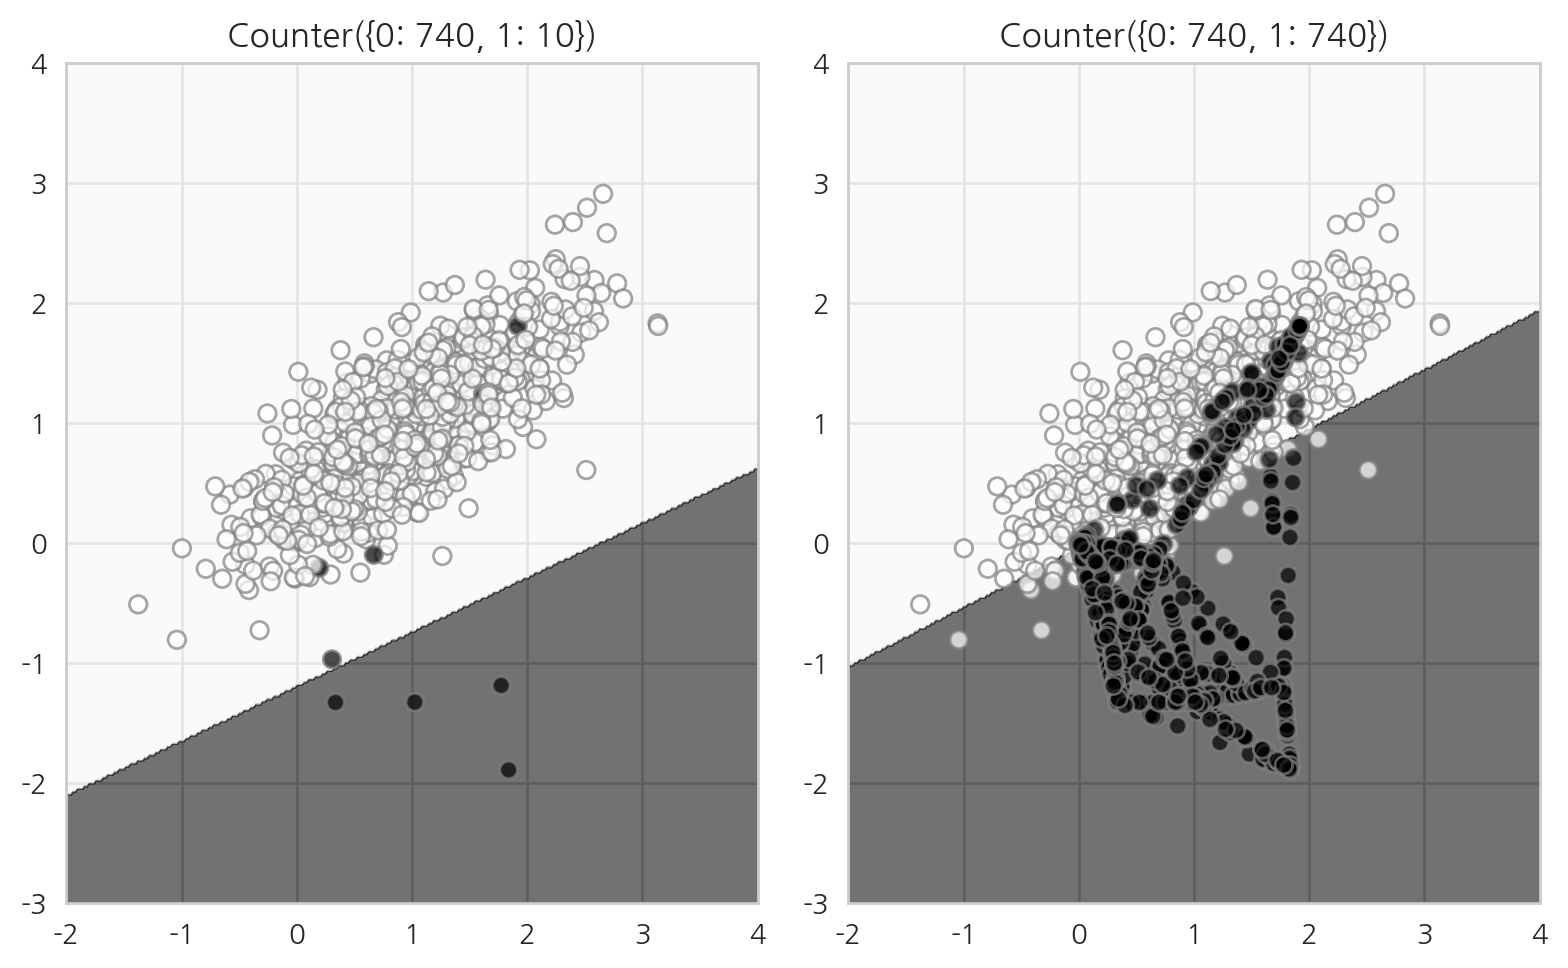

In [267]:
X, y = SMOTE(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [268]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88       740
          1       0.91      0.84      0.87       740

avg / total       0.88      0.88      0.88      1480



## 복합 샘플링

* `SMOTEENN`: SMOTE + ENN
* `SMOTETomek`: SMOTE + Tomek

In [269]:
from imblearn.combine import *

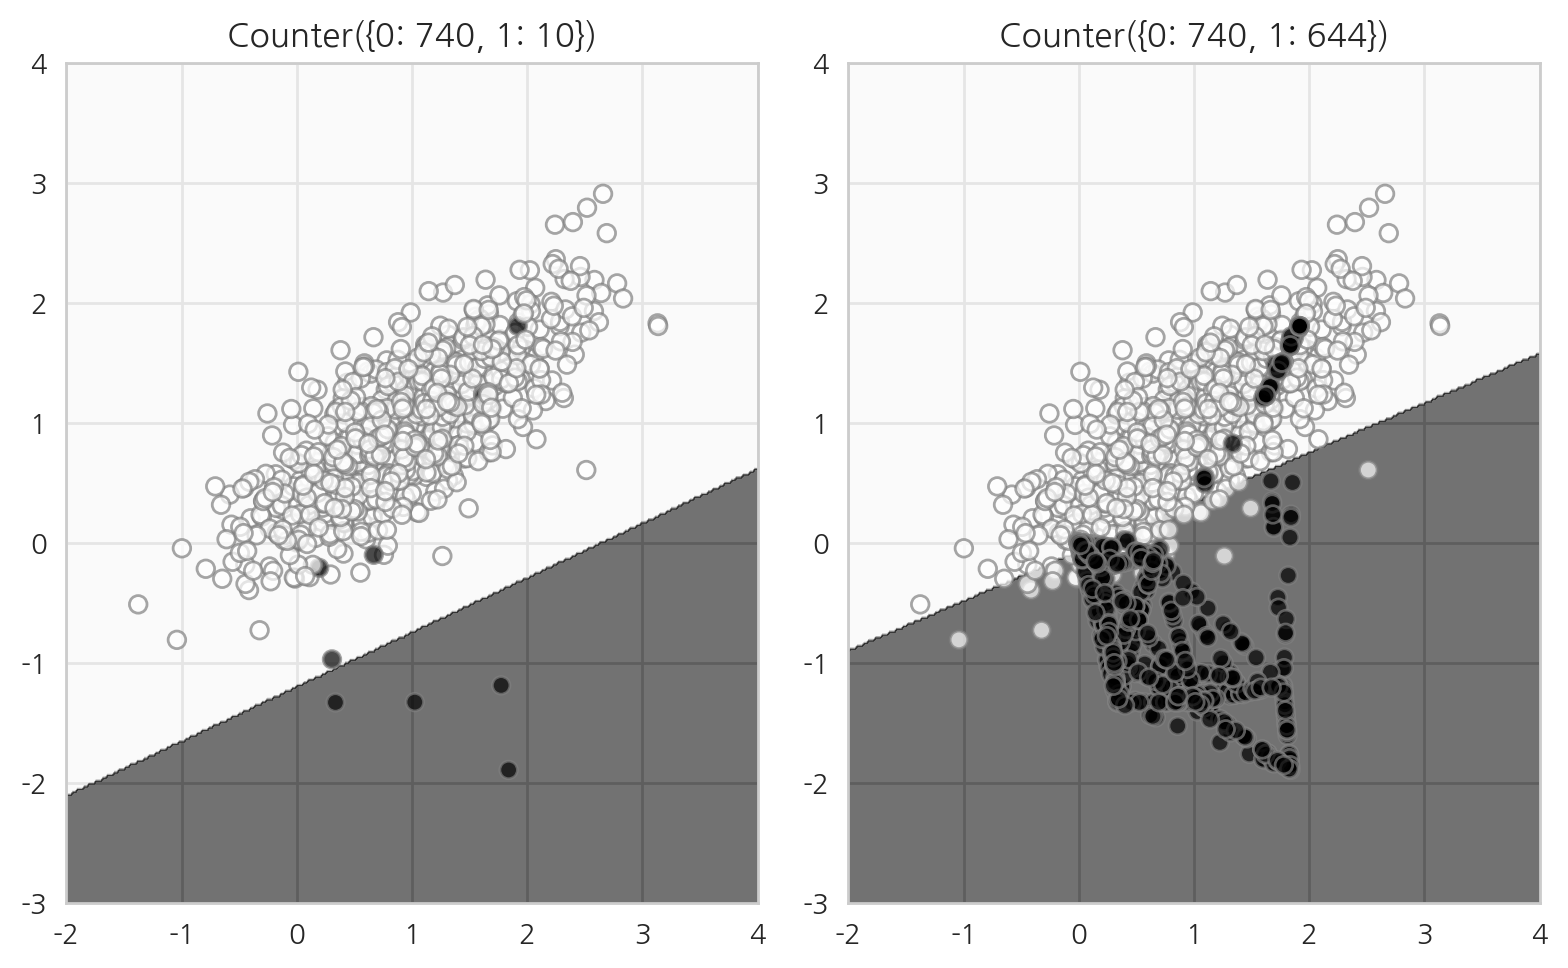

In [270]:
X, y = SMOTEENN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [271]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       740
          1       0.94      0.91      0.93       644

avg / total       0.93      0.93      0.93      1384



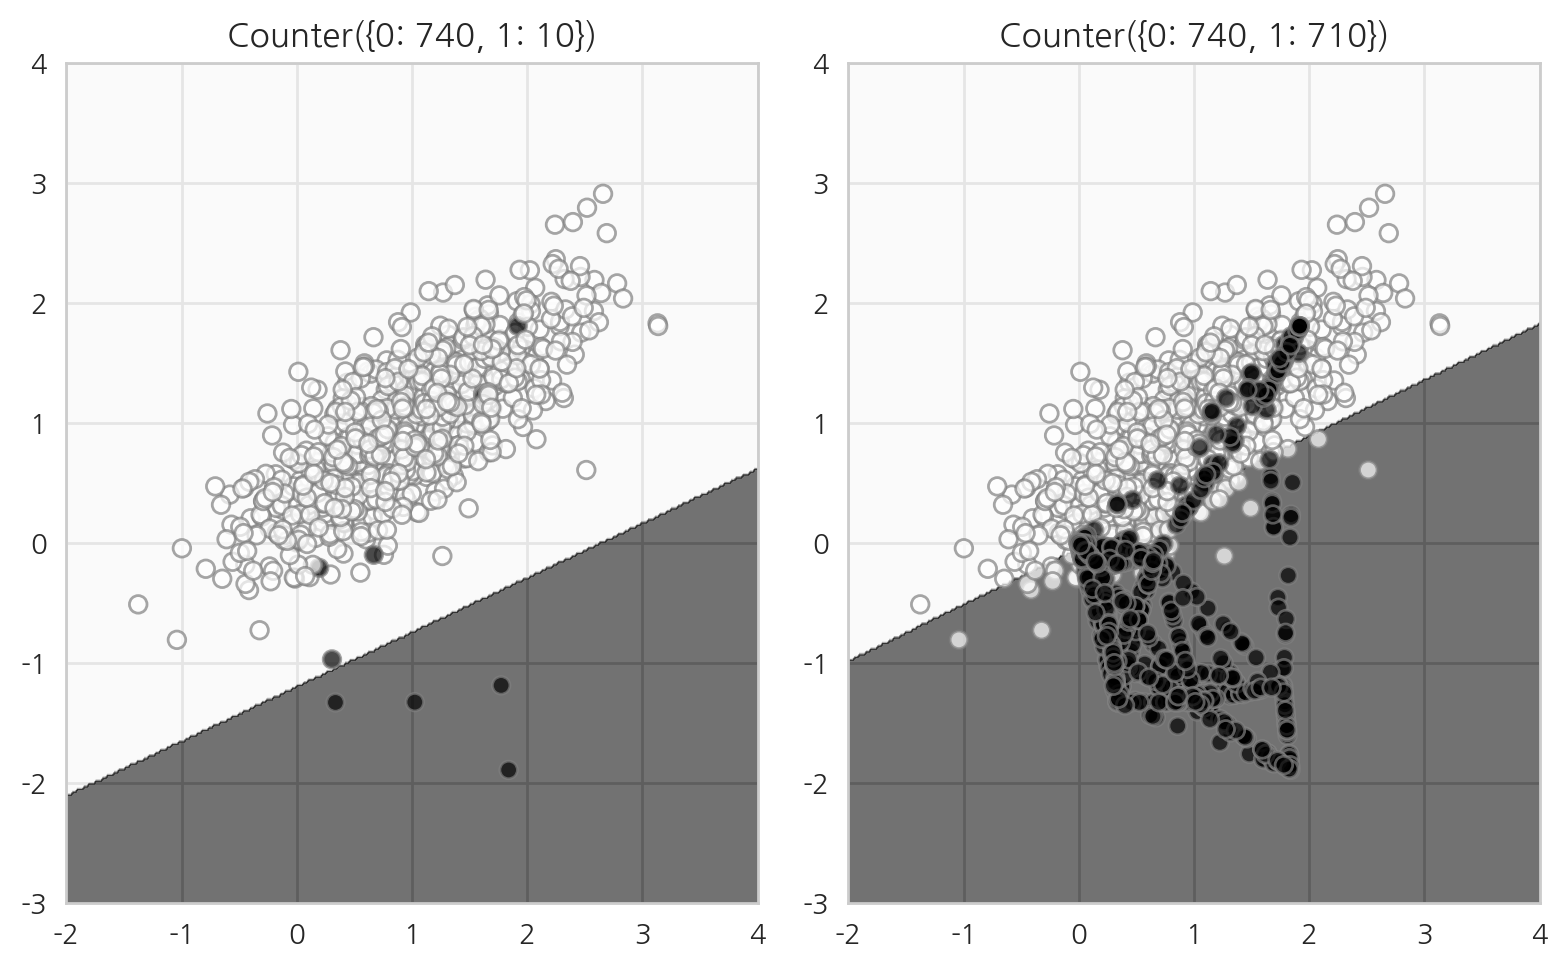

In [272]:
X, y = SMOTETomek(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [273]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       740
          1       0.92      0.86      0.89       710

avg / total       0.90      0.89      0.89      1450



## 참고 문헌

* http://www.ulb.ac.be/di/map/adalpozz/pdf/presentation.pdf
* https://arxiv.org/pdf/1106.1813.pdf